# CREATION OF MODULE(TRAINING)

In [1]:
#Checking For TensorFlow
import numpy
import tensorflow as tf
import tensorflow_hub as hub

print('Version of Tensorflow hub is: ',hub.__version__)
print('Version of Tensorflow is:', tf.__version__)
print('GPU','available :)' if tf.config.list_physical_devices('GPU') else 'not available :(')

Version of Tensorflow hub is:  0.12.0
Version of Tensorflow is: 2.10.0
GPU available :)


#### loading the data and preparing the file names to access the photos

In [165]:
#processing data in req_names.txt to get a dataframe having ID and Name
req_dictionary = {}
with open("105_classes_pins_dataset/req_names.txt") as req_file:
    req_list = req_file.readlines()
    current_name = None
    for i in req_list:
        if i != '\n':
            if "pins" in i:
                current_name=i[5:]
                current_name=current_name[:-2]
            else:
                req_dictionary[i[:-5]]=current_name
required_dataset = {'ID':req_dictionary.keys(),'Name':req_dictionary.values()}
import pandas as pd
req_df = pd.DataFrame(required_dataset)
print(req_df)
req_df.to_csv('req_names.csv')

                      ID          Name
0        Adriana Lima0_0  Adriana Lima
1      Adriana Lima101_3  Adriana Lima
2      Adriana Lima102_4  Adriana Lima
3      Adriana Lima103_5  Adriana Lima
4      Adriana Lima104_6  Adriana Lima
...                  ...           ...
17529   tom ellis96_4426     tom ellis
17530   tom ellis97_4427     tom ellis
17531   tom ellis98_4428     tom ellis
17532   tom ellis99_4429     tom ellis
17533    tom ellis9_4416     tom ellis

[17534 rows x 2 columns]


In [166]:
#number of photos of each person in the dataset
req_df.Name.value_counts()

Leonardo DiCaprio     237
Robert Downey Jr      233
Katherine Langford    226
Alexandra Daddario    225
elizabeth olsen       221
                     ... 
Morgan Freeman        105
Brian J. Smith        102
Cristiano Ronaldo      98
Mark Zuckerberg        95
Lionel Messi           86
Name: Name, Length: 105, dtype: int64

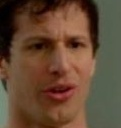

In [167]:
### Lets look at an image from Ipython
from IPython.display import Image
folder = 'pins_'+req_df['Name'][1000]
file = req_df['ID'][1000]+'.jpg'
Image(f'105_classes_pins_dataset/{folder}/{file}')

In [169]:
file_names = []
for i in range(len(req_df)):
    folder = 'pins_'+req_df['Name'][i]
    file = req_df['ID'][i]+'.jpg'
    file_names.append(f'105_classes_pins_dataset/{folder}/{file}')
print(file_names)

['105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima0_0.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima101_3.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima102_4.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima103_5.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima104_6.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima105_7.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima106_8.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima107_9.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima108_10.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima109_11.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima10_2.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima110_13.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima111_14.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima112_15.jpg', '105_classes_pins_dataset/pins_Adriana Lima/A

In [171]:
import numpy as np
labels = np.array(req_df['Name'])
print(labels,len(labels))

['Adriana Lima' 'Adriana Lima' 'Adriana Lima' ... 'tom ellis' 'tom ellis'
 'tom ellis'] 17534


In [172]:
unique_names = np.unique(labels)
print(len(unique_names))

105


In [173]:
boolean_labels = [label == unique_names for label in labels]

In [174]:
X=file_names
y=boolean_labels

#### Converting each image into tensors

In [ ]:
IMG_SIZE=224

def image_tensors(img_path,img_size=IMG_SIZE):

  #read an image file
  image=tf.io.read_file(img_path)

  #Turning the image file into tensors with 3 colors [Red,Green,Blue]
  image=tf.image.decode_jpeg(image,channels=3)

  #Normalizing our image to size 0-1
  image=tf.image.convert_image_dtype(image,dtype=tf.float32)

  #Resizing our image to 224x224
  image =tf.image.resize(image,size=[img_size,img_size])

  return image

In [175]:
print(image_tensors(file_names[6],IMG_SIZE))

tf.Tensor(
[[[0.1188656  0.13455187 0.13063031]
  [0.12518635 0.14087263 0.14435652]
  [0.10883218 0.12451845 0.12844002]
  ...
  [0.14338264 0.14730422 0.15514734]
  [0.12615983 0.13008142 0.13792455]
  [0.13600017 0.14798376 0.15313956]]

 [[0.12546311 0.14114937 0.1372278 ]
  [0.14760779 0.16329406 0.1593725 ]
  [0.14000808 0.15569434 0.15177277]
  ...
  [0.1351545  0.13907608 0.14691919]
  [0.11406957 0.11799113 0.12583427]
  [0.12282912 0.13481273 0.13996851]]

 [[0.12944679 0.14513306 0.14763656]
  [0.15133019 0.16701646 0.16951998]
  [0.11173846 0.12742473 0.12624243]
  ...
  [0.1320751  0.13278413 0.14062726]
  [0.10920808 0.11312965 0.12097279]
  [0.13512787 0.14050709 0.14786434]]

 ...

 [[0.13512239 0.15080866 0.14688711]
  [0.12041257 0.12869339 0.1247718 ]
  [0.11157355 0.11716704 0.11999442]
  ...
  [0.852346   0.7806633  0.6770305 ]
  [0.86120003 0.77884704 0.67252684]
  [0.8470589  0.75664395 0.64560574]]

 [[0.12224527 0.13793156 0.13400999]
  [0.13629846 0.1513072  0

In [ ]:
def get_image_label(img_path,label):
  img=image_tensors(img_path)
  return img,label

In [ ]:
BATCH_SIZE=32

def create_data_batch(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):

  if test_data:
    print('Creating data batches for test data')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #just making a dataset out of data
    data=data.map(image_tensors).batch(batch_size)
    return data

  elif valid_data:
    print('Creating data batches for valid data')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.map(get_image_label).batch(batch_size)
    return data
  else:
    print('Creating data batches for train data')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.shuffle(len(X))
    data=data.map(get_image_label).batch(batch_size)
    return data


In [ ]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE=len(unique_names)

MODEL_URL="imagenet_mobilenet_v2_130_224_classification_5/"

#### Creating the model using [Imagenet Mobilenet V2](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('Building model with:',model_url)

  ## Setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(model_url), ## Layer1 (MODEL_URL)
      tf.keras.layers.Dense(units=output_shape,   ## Layer2 (Just making output to come in our required shpae)
                             activation="softmax")
      ])

  ## Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  ## Building the model
  model.build(input_shape)

  return model

In [176]:
model=create_model()
model.summary()

Building model with: imagenet_mobilenet_v2_130_224_classification_5/
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_6 (Dense)             (None, 105)               105210    
                                                                 
Total params: 5,537,923
Trainable params: 105,210
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
## Load tensor board notebook extension
%load_ext tensorboard

In [ ]:
import datetime
import os

## Create a function for callbacks
def create_tensor_callbacks():
  log_dir=os.path.join('/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  return tf.keras.callbacks.TensorBoard(log_dir)

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [ ]:
## Creating data batch of full size
full_data=create_data_batch(X,y)

full_model=create_model()

full_model_tensorboard=create_tensor_callbacks()

full_model_earlystopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

#### Training the model

In [ ]:
full_model.fit(x=full_data,epochs=150,callbacks=[full_model_tensorboard,full_model_earlystopping])

In [21]:
full_model.fit(x=full_data,epochs=150,callbacks=[full_model_tensorboard,full_model_earlystopping])

Epoch 1/150


2022-11-24 19:45:52.727515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-24 19:45:53.706433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


548/548 [==============================] - 98s 176ms/step - loss: 3.4828 - accuracy: 0.1844
Epoch 2/150
548/548 [==============================] - 99s 181ms/step - loss: 2.5459 - accuracy: 0.3526
Epoch 3/150
548/548 [==============================] - 99s 180ms/step - loss: 2.2176 - accuracy: 0.4214
Epoch 4/150
548/548 [==============================] - 107s 195ms/step - loss: 2.0222 - accuracy: 0.4605
Epoch 5/150
548/548 [==============================] - 102s 186ms/step - loss: 1.8669 - accuracy: 0.4965
Epoch 6/150
548/548 [==============================] - 110s 200ms/step - loss: 1.7631 - accuracy: 0.5192
Epoch 7/150
548/548 [==============================] - 114s 207ms/step - loss: 1.6534 - accuracy: 0.5473
Epoch 8/150
548/548 [==============================] - 119s 217ms/step - loss: 1.5740 - accuracy: 0.5698
Epoch 9/150
548/548 [==============================] - 120s 220ms/step - loss: 1.5076 - accuracy: 0.5842
Epoch 10/150
548/548 [==============================] - 120s 220ms/ste

#### Saving the model

In [22]:
def save_model(model,suffix=None):
  """
  This function saves the given model into a specific location
  """
  model_dir=os.path.join('/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data',datetime.datetime.now().strftime('%Y%m%d-%H%M%'))
  model_path=model_dir+'-'+suffix+'.h5'

  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path

In [23]:
save_model(full_model,suffix='full_model')

Saving model to: /Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/20221124-2253%-full_model.h5


'/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/20221124-2253%-full_model.h5'

In [24]:
def load_model(model_path):
  """
  This function is used to load a model from a given location
  """
  print(f"Loading model from {model_path}")

  model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model